<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Confirmed_Cases_France_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [73]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_cases.csv", index_col='date')
total_cases[["France", "Italy"]].tail(3)

,France,Italy
date,,
2020-03-21,12612,47021
2020-03-22,14459,53578
2020-03-23,16018,59138


In [0]:
list_countries = ['France', 'Italy']

In [0]:
TIPPING_POINT = 131

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'

In [0]:
France_schools = '2020-03-16'
Italy_schools = '2020-03-05'

In [0]:
cases = {}
for country in list_countries:
  cases[country] = total_cases[country][total_cases[country] > TIPPING_POINT]

In [79]:
cases["France"].head(3)

date
2020-03-03    178
2020-03-04    212
2020-03-05    285
Name: France, dtype: int64

In [0]:
France_starting_date = '2020-03-03'

In [81]:
cases["Italy"].head(3)

date
2020-02-24    132
2020-02-25    229
2020-02-26    322
Name: Italy, dtype: int64

In [0]:
Italy_starting_date = '2020-02-24'

In [83]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(cases["France"].keys()[0])).days
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(cases["Italy"].keys()[0])).days
France_gap_schools = (pd.to_datetime(France_schools) - pd.to_datetime(cases["France"].keys()[0])).days
Italy_gap_schools = (pd.to_datetime(Italy_schools) - pd.to_datetime(cases["Italy"].keys()[0])).days
France_gap, Italy_gap, France_gap_schools, Italy_gap_schools

(15, 15, 13, 10)

In [0]:
x_trn_FR = np.arange(France_gap)
x_trn_IT = np.arange(Italy_gap)

In [0]:
x_trn_FR = x_trn_FR[...,None]
x_trn_IT = x_trn_IT[...,None]

In [0]:
y_trn_FR = np.log(np.array(cases["France"].iloc[:France_gap]))
y_trn_IT = np.log(np.array(cases["Italy"].iloc[:Italy_gap]))

In [87]:
cases['France'].head()

date
2020-03-03    178
2020-03-04    212
2020-03-05    285
2020-03-06    423
2020-03-07    613
Name: France, dtype: int64

In [0]:
x = np.arange(len(cases["Italy"]))
x = x[...,None]

In [0]:
from sklearn.linear_model import LinearRegression

lm_FR = LinearRegression()
lm_FR.fit(x_trn_FR, y_trn_FR)
preds_FR = np.exp(lm_FR.predict(x))

In [0]:
lm_IT = LinearRegression()
lm_IT.fit(x_trn_IT, y_trn_IT)
preds_IT = np.exp(lm_IT.predict(x))

In [91]:
lm_FR.coef_, lm_IT.coef_

(array([0.26650047]), array([0.27597578]))

In [92]:
lm_FR.score(x_trn_FR, y_trn_FR), lm_IT.score(x_trn_IT, y_trn_IT)

(0.9911926441762691, 0.9833723985103766)

In [0]:
France = pd.Series()
for i in np.arange(len(cases['France'])):
  France[(pd.to_datetime(cases['France'].head(1).keys()) + pd.DateOffset(i)).strftime('%m-%d')[0]] = cases['France'][i]

In [0]:
Italy = pd.Series()
for i in np.arange(len(cases['Italy'])):
  Italy[(pd.to_datetime(cases['France'].head(1).keys()) + pd.DateOffset(i)).strftime('%m-%d')[0]] = cases['Italy'][i]

In [95]:
(pd.to_datetime(cases['Italy'].head(1).keys()) - pd.to_datetime(cases['France'].head(1).keys()))[0]

Timedelta('-8 days +00:00:00')

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

plm_FR = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
plm_FR.fit(x_trn_FR, y_trn_FR)
print(f"Score: {plm_FR.score(x_trn_FR, y_trn_FR):.3f}")
preds_square_FR = np.exp(plm_FR.predict(x))

Score: 0.998


In [97]:
plm_IT = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
plm_IT.fit(x_trn_IT, y_trn_IT)
print(f"Score: {plm_IT.score(x_trn_IT, y_trn_IT):.3f}")
preds_square_IT = np.exp(plm_IT.predict(x))

Score: 0.997


In [98]:
len(x_trn_FR)

15

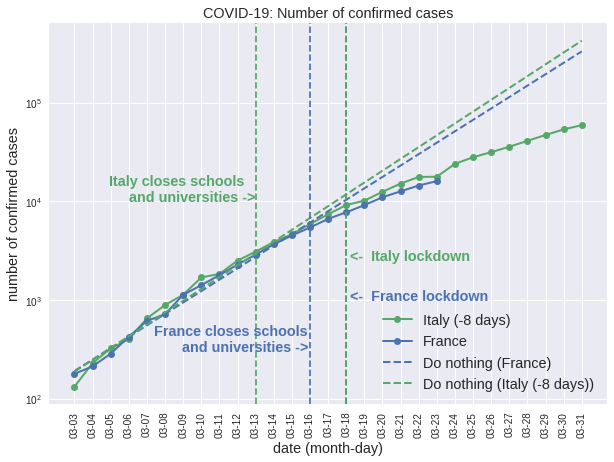

In [101]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(Italy, label='Italy (-8 days)', linewidth=2, color='C1', marker='o')
plt.plot(France, label='France', linewidth=2, color='C0', marker='o')

# ax.plot(x, preds_square_FR, label="Do nothing square (France)", linewidth=2, color='C0', linestyle='dashed')
# ax.plot(x, preds_square_IT, label="Do nothing square (Italy)", linewidth=2, color='C1', linestyle='dashed')
ax.plot(x, preds_FR, label="Do nothing (France)", linewidth=2, color='C0', linestyle='dashed')
ax.plot(x, preds_IT, label="Do nothing (Italy (-8 days))", linewidth=2, color='C1', linestyle='dashed')

plt.axvline(France_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(Italy_gap_schools, color='C1', linestyle='dashed')
plt.axvline(France_gap_schools, color='C0', linestyle='dashed')

plt.annotate('<-  Italy lockdown', (Italy_gap,2500.0), xytext=(Italy_gap+0.2,2500.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<-  France lockdown', (France_gap,1000.0), xytext=(France_gap+0.2,1000.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('Italy closes schools\n     and universities ->', (Italy_gap_schools,27000.0), \
             xytext=(Italy_gap_schools-8.1,10000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('France closes schools\n       and universities ->', (France_gap_schools,23000.0), \
             xytext=(France_gap_schools-8.6,300.0), color='C0', fontsize='x-large', fontweight='bold')

ax.set_title('COVID-19: Number of confirmed cases', fontsize='x-large')
ax.set_xlabel('date (month-day)', fontsize='x-large')
ax.set_ylabel('number of confirmed cases', fontsize='x-large')
ax.legend(fontsize='x-large')

ax.set_xticks(np.arange(0, len(Italy.keys()),1))
plt.xticks(rotation=90)
plt.yscale("log")
plt.savefig("2020-03-23-COVID-19-Confirmed-Cases-France-Italy.png", format='png', dvi=500)

In [0]:
from google.colab import files
files.download("2020-03-23-COVID-19-Confirmed-Cases-France-Italy.png")

In [0]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(Italy, label='Italy (-8 days)', linewidth=2, color='C1', marker='o')
plt.plot(France, label='France', linewidth=2, color='C0', marker='o')

ax.plot(x, preds_FR, label="Do nothing (France)", linewidth=2, color='C0', linestyle='dashed')
ax.plot(x, preds_IT, label="Do nothing (Italy)", linewidth=2, color='C1', linestyle='dashed')

plt.axvline(France_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(Italy_gap_schools, color='C1', linestyle='dashed')
plt.axvline(France_gap_schools, color='C0', linestyle='dashed')

plt.annotate('<-  Italy lockdown', (Italy_gap,45000.0), xytext=(Italy_gap+0.2,45000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<-  France lockdown', (France_gap,35000.0), xytext=(France_gap+0.2,35000.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('Italy closes schools\n     and universities ->', (Italy_gap_schools,45000.0), \
             xytext=(Italy_gap_schools-8.1,45000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('France closes schools\n       and universities ->', (France_gap_schools,35000.0), \
             xytext=(France_gap_schools-8.6,35000.0), color='C0', fontsize='x-large', fontweight='bold')

ax.set_title('COVID-19: Number of known cases', fontsize='x-large')
ax.set_xlabel('dates (month-day)', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.legend(fontsize='x-large')

ax.set_xticks(np.arange(0, len(Italy.keys()),1))
plt.xticks(rotation=90)
plt.show()